# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reynard Nathanael
- **Email:** jiangreynard@gmail.com
- **ID Dicoding:** reynardnathanael

## Menentukan Pertanyaan Bisnis

- Berapakah jumlah rental sepeda di setiap bulan pada masing-masing tahun?
- Pada jam berapakah jumlah rental tertinggi dan terendah secara keseluruhan?
- Bagaimana jumlah rental yang ada pada setiap kelompok waktu dan kelompok temperature?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import calendar
calendar.setfirstweekday(calendar.SUNDAY)
calendar.day_name = calendar.day_name[calendar.SUNDAY:] + calendar.day_name[:calendar.SUNDAY]

## Data Wrangling

### Gathering Data

In [3]:
# READ THE CSV FILES
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# CHECK IF THE FILE EXIST BY LOOKING AT THE FIRST 5 DATA
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari 5 data yang ditampilkan menggunakan head(), dapat dilihat bahwa data sudah terdistribusi dengan cukup baik
- Walaupun tidak ditemukan kesalahan fatal pada dataset, namun terdapat beberapa kolom yang nilainya masih tidak ditampilkan secara eksplisit, seperti kolom season, year, dsb yang masih ditampilkan dalam bentuk angka, serta beberapa kolom seperti temp, atemp, dsb yang masih dinormalisasi. Nilai-nilai ini dapat diubah pada tahap data cleaning dengan mengacu pada penjelasan di file Readme.txt

### Assessing Data

In [4]:
# day.csv

# CHECK DATA TYPE
day_df.info()

# CHECK MISSING VALUES
day_df.isna().sum()

# CHECK DUPLICATES
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# SHOW STATISTICS PARAMETER
day_df.describe()


# hour.csv

# CHECK DATA TYPE
hour_df.info()

# # CHECK MISSING VALUES
hour_df.isna().sum()

# # CHECK DUPLICATES
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

# # SHOW STATISTICS PARAMETER
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ketika dilakukan pengecekan tipe data, ditemukan bahwa kolom dteday bertipe object, yang seharusnya adalah datetime
- Tidak ditemukan adanya missing values dari kedua dataset
- Tidak ditemukan adanya duplikasi data
- Data dari parameter statistik juga tidak menunjukkan adanya anomali pada dataset

### Cleaning Data

In [5]:
# day.csv

# CHANGE dteday DATA TYPE TO DATETIME
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

# CHANGE season FROM NUMBER TO REAL VALUE
day_df["season"] = day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

# CHANGE year FROM NUMBER TO REAL VALUE
day_df["yr"] = day_df["yr"].map({
    0: 2011,
    1: 2012
})

# CHANGE month AND weekday FROM NUMBER TO REAL VALUE
day_df["mnth"] = day_df["mnth"].apply(lambda x: calendar.month_name[x])
day_df["weekday"] = day_df["weekday"].apply(lambda x: calendar.day_name[x])

# REVERT CHANGES FROM temp, atemp, hum, and windspeed TO ORIGINAL VALUE
day_df["temp"] = day_df["temp"] * (41)
day_df["atemp"] = day_df["atemp"] * (50)
day_df["hum"] = day_df["hum"] * (100)
day_df["windspeed"] = day_df["windspeed"] * (67)

day_df.head()


# hour.csv

# CHANGE dteday DATA TYPE TO DATETIME
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

# CHANGE season FROM NUMBER TO REAL VALUE
hour_df["season"] = hour_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

# CHANGE year FROM NUMBER TO REAL VALUE
hour_df["yr"] = hour_df["yr"].map({
    0: 2011,
    1: 2012
})

# CHANGE month AND weekday FROM NUMBER TO REAL VALUE
hour_df["mnth"] = hour_df["mnth"].apply(lambda x: calendar.month_name[x])
hour_df["weekday"] = hour_df["weekday"].apply(lambda x: calendar.day_name[x])

# REVERT CHANGES FROM temp, atemp, hum, and windspeed TO ORIGINAL VALUE
hour_df["temp"] = hour_df["temp"] * (41)
hour_df["atemp"] = hour_df["atemp"] * (50)
hour_df["hum"] = hour_df["hum"] * (100)
hour_df["windspeed"] = hour_df["windspeed"] * (67)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday berhasil diubah tipe datanya dari object menjadi datetime, sehingga dapat menampung value secara tepat
- Sejumlah kolom yang menunjukkan waktu (season, year, month, dan weekday) berhasil dikonversi nilainya dari angka menjadi nilai sesungguhnya agar tidak ambigu
- Sejumlah kolom yang menunjukkan nilai terkait iklim/cuaca (temp, atemp, hump, dan windspeed) berhasil dikonversi nilainya, dengan mengembalikannya dari nilai yang sudah dinormalisasi menjadi nilai asal menggunakan perkalian

## Exploratory Data Analysis (EDA)

### Explore Jumlah Rental pada Tahun 2011 dan 2012

In [6]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by=["yr", "cnt"], ascending=False)

casual  registered     cnt
yr   mnth                                 
2012 September   43778      174795  218573
     August      43197      171306  214503
     July        41705      161902  203607
     June        43294      159536  202830
     October     34538      164303  198841
     May         44235      151630  195865
     April       38456      135768  174224
     March       31618      133257  164875
     November    21009      131655  152664
     December    13245      110468  123713
     February     8721       94416  103137
     January      8969       87775   96744
2011 June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     May         31050      104771  135821
     September   26545      100873  127418
     October     25222       98289  123511
     November    15594       86573  102167
     April       22346       72524   94870
     December     8448       78875   87323
     March       12826       51219   64045
     February     6242       41973   48215
     January      3073       35116   38189

**Insight:**
- Data jumlah rental dikelompokkan berdasarkan tahun dan bulan, kemudian disortir berdasarkan jumlah rental terbanyak
- Jumlah rental paling banyak pada tahun 2011 terjadi pada bulan Juni, sedangkan pada tahun 2012 terjadi pada bulan September
- Jumlah rental terendah pada kedua tahun sama-sama diisi oleh bulan Januari pada peringkat pertama, dan bulan Februari pada peringkat kedua

In [7]:
# MAKE A LIST FOR REINDEXING BY MONTH
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# CREATE AGG FOR YEAR ONE (2011)
amount_year_one = day_df[day_df["yr"] == 2011].groupby(by="mnth").agg({
    "cnt": "sum"
})
amount_year_one = amount_year_one.reindex(new_order, level=1)
print(amount_year_one)

# CREATE AGG FOR YEAR TWO (2012)
amount_year_two = day_df[day_df["yr"] == 2012].groupby(by="mnth").agg({
    "cnt": "sum"
})
amount_year_two = amount_year_two.reindex(new_order, level=1)
print(amount_year_two)

              cnt
mnth             
January     38189
February    48215
March       64045
April       94870
May        135821
June       143512
July       141341
August     136691
September  127418
October    123511
November   102167
December    87323
              cnt
mnth             
January     96744
February   103137
March      164875
April      174224
May        195865
June       202830
July       203607
August     214503
September  218573
October    198841
November   152664
December   123713


### Explore Jumlah Rental pada Setiap Jam

In [8]:
hour_df.groupby(by=["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by=["cnt"], ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


**Insight:**
- Data jumlah rental dikelompokkan berdasarkan jam, kemudian disortir berdasarkan jumlah rental terbanyak
- Jumlah rental paling banyak terjadi pada jam 17:00, dan paling sedikit terjadi pada jam 04:00

In [9]:
# CREATE AGG BY GROUPPING THE DATA BY HOUR
amount_by_hour = hour_df.groupby(by=["hr"]).agg({
    "cnt": "sum"
}).reset_index().sort_values(by=["cnt"], ascending=False)
amount_by_hour['hr'] = amount_by_hour['hr'].astype(str) + ":00"

### Melakukan manual groupping dengan menambahkan field "time_group" dan "temp_group" untuk melakukan analisis lanjutan

In [10]:
# MANUAL GROUPPING BY TIME (MORNING, AFTERNOON, EVENING)
hour_df["time_group"] = hour_df.hr.apply(lambda x: "Evening" if x <= 4 else ("Afternoon" if x > 10 else "Morning"))
bytime_df = hour_df.groupby(by="time_group").agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False)
print(bytime_df)

# MANUAL GROUPPING BY TEMPERATURE (COLD, CHILLY, WARM, HOT)
hour_df["temp_group"] = hour_df.temp.apply(lambda x: "Cold" if x < 10 else ("Chilly" if x < 18 else ("Warm" if x < 24 else "Hot")))
bytemp_df = hour_df.groupby(by="temp_group").agg({
    "cnt": "sum"
}).reset_index().sort_values(by="cnt", ascending=False)
print(bytemp_df)

  time_group      cnt
0  Afternoon  2430171
2    Morning   770260
1    Evening    92248
  temp_group      cnt
2        Hot  1717559
3       Warm   750140
0     Chilly   684079
1       Cold   140901


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapakah jumlah rental sepeda di setiap bulan pada masing-masing tahun?

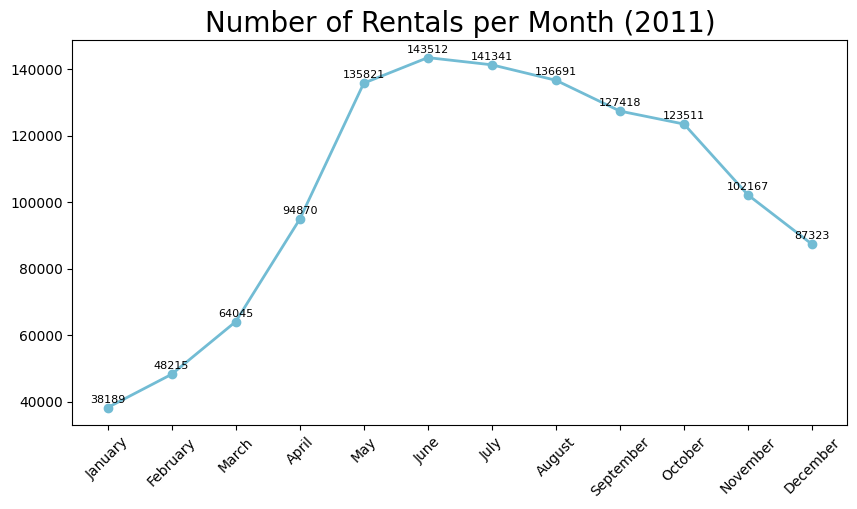

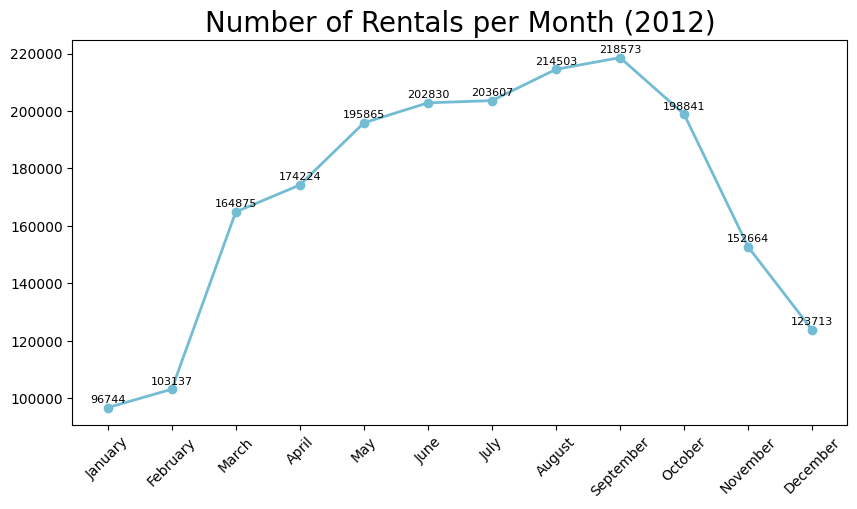

In [11]:
# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF RENTAL FOR THE FIRST YEAR (2011)
plt.figure(figsize=(10, 5))
plt.plot(amount_year_one.index, amount_year_one["cnt"], marker='o', linewidth=2, color="#72BCD4")

# ITERATION FOR DISPLAYING THE VALUE ON EACH POINT
for x, y in zip(amount_year_one.index, amount_year_one["cnt"]):
    plt.text(x, y+1000, str(y), ha="center", va="bottom", fontsize=8)

plt.title("Number of Rentals per Month (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF RENTAL FOR THE SECOND YEAR (2012)
plt.figure(figsize=(10, 5))
plt.plot(amount_year_two.index, amount_year_two["cnt"], marker='o', linewidth=2, color="#72BCD4")

# ITERATION FOR DISPLAYING THE VALUE ON EACH POINT
for x, y in zip(amount_year_two.index, amount_year_two["cnt"]):
    plt.text(x, y+1000, str(y), ha='center', va='bottom', fontsize=8)

plt.title("Number of Rentals per Month (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Pada jam berapakah jumlah rental tertinggi dan terendah secara keseluruhan?

<ipython-input-12-5ea5dd59f46c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=amount_by_hour.head(5), palette=colors, ax=ax[0])
<ipython-input-12-5ea5dd59f46c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="hr", data=amount_by_hour.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])


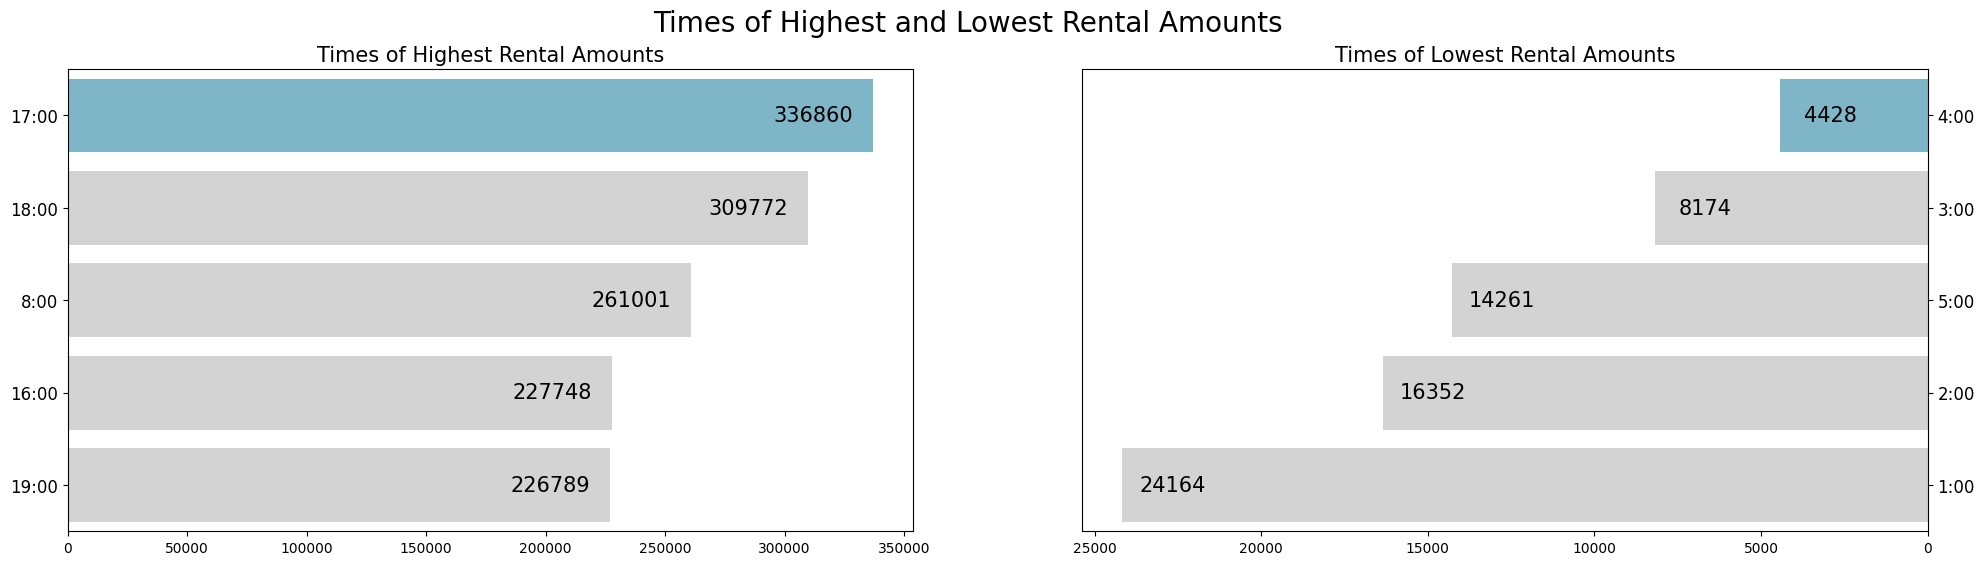

In [12]:
# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF THE TOP 5 HIGHEST RENTAL
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="cnt", y="hr", data=amount_by_hour.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Times of Highest Rental Amounts", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# ITERATION FOR DISPLAYING THE VALUE INSIDE THE BAR
for p in ax[0].patches:
  width = p.get_width()
  ax[0].text(p.get_width() - 25000, p.get_y() + p.get_height() / 2, str(int(width)), ha="center", va="center", fontsize=15, color="black")

# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF THE TOP 5 LOWEST RENTAL
sns.barplot(x="cnt", y="hr", data=amount_by_hour.sort_values(by="cnt", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Times of Lowest Rental Amounts", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# ITERATION FOR DISPLAYING THE VALUE INSIDE THE BAR
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(p.get_width() - 1500, p.get_y() + p.get_height() / 2, str(int(width)), ha="center", va="center", fontsize=15, color="black")

plt.suptitle("Times of Highest and Lowest Rental Amounts", fontsize=20)
plt.show()

**Insight:**
- Pada visualisasi data untuk pertanyaan pertama, dibuat 2 buah line chart untuk menampilkan jumlah rental pada masing-masing tahun menurut setiap bulannya. Line chart dipilih karena data yang ditampilkan termasuk dalam time series.
- Pada visualisasi data untuk pertanyaan kedua, dibuat 2 buah bar chart untuk menampilkan jumlah rental paling tinggi dan paling rendah menurut jamnya, dengan 5 data yang mewakili masing-masing kategori. Bar chart dipilih karena visualisasi data dimaksudkan untuk melakukan perbandingan, dan data yang ditampilkan juga tidak banyak (< 10).

## Analisis Lanjutan:
### Bagaimana jumlah rental yang ada pada setiap kelompok waktu dan kelompok temperature? (menggunakan manual groupping)

<ipython-input-13-244eceeab40f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph1 = sns.barplot(


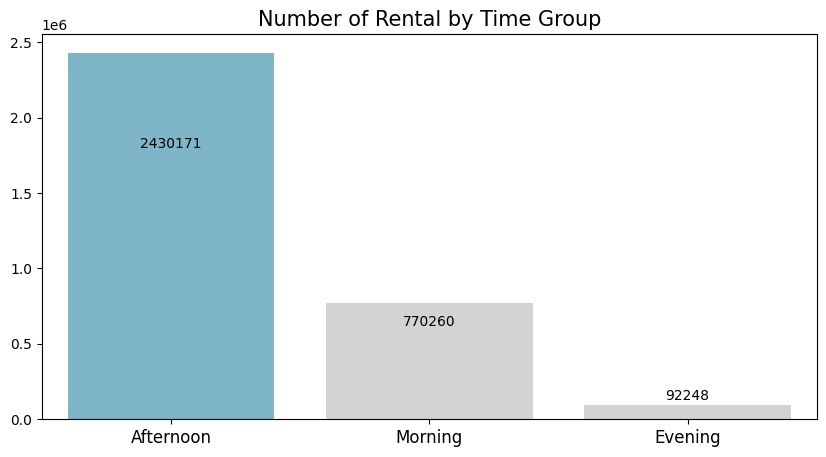

<ipython-input-13-244eceeab40f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph2 = sns.barplot(


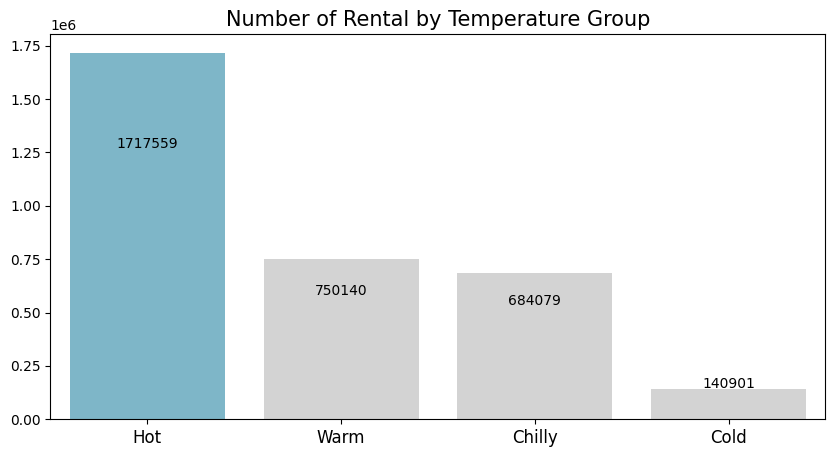

In [13]:
# TIME GROUPPING
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF RENTAL BY TIME GROUP
graph1 = sns.barplot(
    y="cnt",
    x="time_group",
    data=bytime_df,
    palette=colors_
)

# ITERATION FOR DISPLAYING THE VALUE INSIDE THE BAR
for g1 in graph1.patches:
    graph1.annotate(
        format(g1.get_height(), '.0f'),
        (g1.get_x() + g1.get_width() / 2., g1.get_height() / 1.4),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title("Number of Rental by Time Group", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


# TEMP GROUPPING
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# CREATE A GRAPH FOR DISPLAYING THE AMOUNT OF RENTAL BY TEMPERATURE GROUP
graph2 = sns.barplot(
    y="cnt",
    x="temp_group",
    data=bytemp_df,
    palette=colors_
)

# ITERATION FOR DISPLAYING THE VALUE INSIDE THE BAR
for g2 in graph2.patches:
    graph2.annotate(
        format(g2.get_height(), '.0f'),
        (g2.get_x() + g2.get_width() / 2., g2.get_height() / 1.4),
        ha='center', va='center',
        fontsize=10, color='black',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.title("Number of Rental by Temperature Group", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Solusi dari pertanyaan 1 adalah line chart yang berhasil dibuat untuk menampilkan jumlah rental pada tahun 2011 dan 2012 setiap bulannya. Dari grafik yang ditampilkan, dapat dilihat bahwa jumlah terendah pada kedua tahun terletak di bulan januari dan februari. Namun, jumlah rental juga relatif naik setelah bulan februari, terutama pada tahun 2012 yang mengalami kenaikan secara signifikan pada bulan maret. Selain itu, jumlah rental pada kedua tahun juga terlihat mengalami penurunan secara konsisten, yang dimulai pada bulan juli untuk tahun 2011 dan bulan oktober untuk tahun 2012.
- Solusi dari pertanyaan 2 adalah bar chart yang berhasil dibuat untuk menampilkan masing-masing 5 data yang mewakili jumlah rental tertinggi dan terendah yang dikelompokkan berdasarkan jam. Rental tertinggi terletak pada jam 17:00 dan rental terendah terletak pada jam 4:00.
- Pada analisis lanjutan, dibuat dua bar chart yang masing-masing menampilkan hasil manual groupping. Grafik pertama menampilkan jumlah rental berdasarkan kelompok waktu, sehingga didapatkan bahwa jumlah rental tertinggi ada pada siang hari, dan yang terendah ada pada sore/malam hari. Grafik kedua menampilkan jumlah rental berdasarkan kelompok suhu/temperatur. Dari grafik tersebut dapat ditarik kesimpulan bahwa pada suhu panas terdapat jumlah rental paling banyak, sedangkan pada suhu dingin terdapat jumlah rental paling sedikit.

## Download The Data

In [14]:
hour_df.to_csv("data.csv", index=False)